# Assignment 1: Question 1

## The Question

The crucial task before applying any machine learning algorithms is to understand the given
data, i.e., a thorough data analysis cum data visualization is always necessary. As the part of this
assignment, you are given a dataset, from which the following informations are to be extracted.
Dataset : stackOverflow.csv
Information to be extracted out:
1. Find out the no. of questions asked with respect to the given Tags.
2. Find out the most commonly used tags and what is the trend in Data Science Tags.
3. The average time is taken to answer a question.
4. Numbers of views related to the number of Answers.
5. Tags get highest/lowest rating in Questions.
6. Tags get highest/lowest rating in Answers.
7. Find out the most Active/Inactive in answering the questions.
8. Which tags draws the highest/lowest views?

## The Solution

### Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### Loading the data into a DataFrame

In [29]:
df = pd.read_csv('stackOverflow.csv')

### Part 1 and 2

#### Extract qids amd tags

In [30]:
df_filter = df[['qid', 'tags']]
df_filter = df_filter.drop_duplicates()

#### Getting the values

In [31]:
df_tags = df_filter['tags'].values
df_qid = df_filter['qid'].values

#### Separating the tags to a single list

In [32]:
bag_list = []
for tag_list in df_tags :
    tag_list_array = tag_list.split(',')
    for tags in tag_list_array:
        bag_list.append(tags)

#### Counting the tags individually using Counter and putting in a DF

In [33]:
element_count = Counter(bag_list)
df_filter_res = pd.DataFrame(list(element_count.items()), columns=['tag', 'count'])
df_filter_res = df_filter_res.sort_values(by=['count'], ascending=False)
df_filter_res.to_csv('tags_freqency.csv', index=False)
df_filter_res

,tag,count
97,c#,11793
25,ûnet,6328
90,java,5800
14,aspûnet,5459
21,javascript,4168
43,c++,4011
0,php,3771
26,python,3004
172,sql,2663
20,jquery,2618


#### Number of Questions v/s Tags (Top 30)

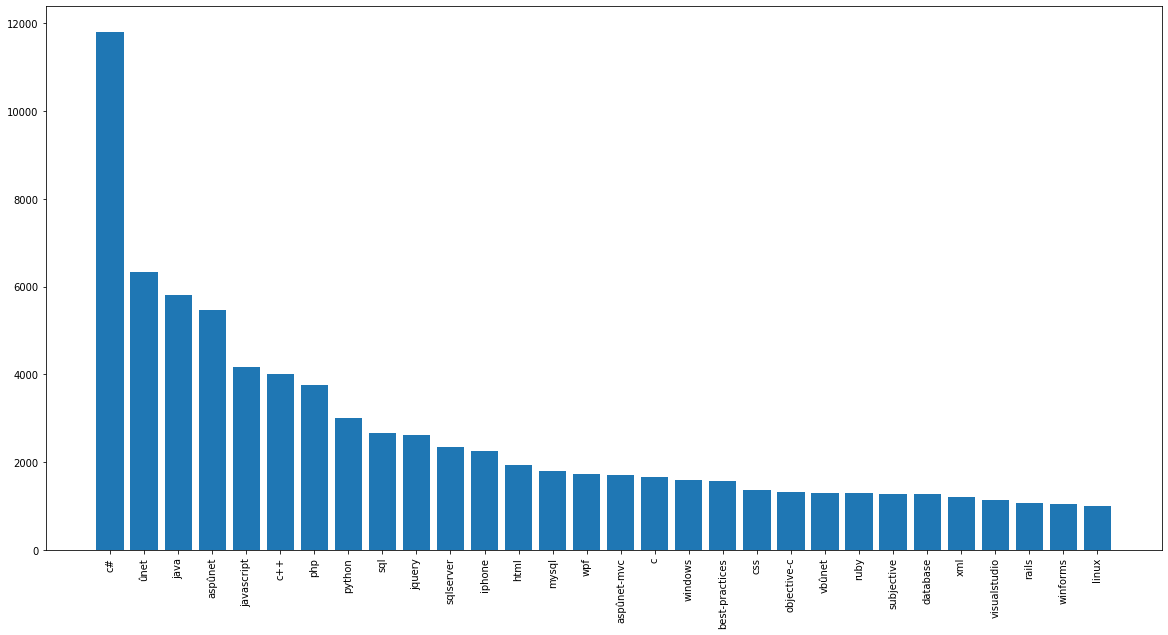

In [34]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.xticks(rotation='vertical')
plt.bar(df_filter_res['tag'].values[:30], df_filter_res['count'].values[:30])
plt.show()

### Part 3

#### Calculating the answer times for each answer

In [35]:
df['ans_time'] = df['at'] - df['qt']

#### The DF with answer times

In [36]:
df

,Unnamed: 0,qid,i,qs,qt,tags,qvc,qac,aid,j,as,at,ans_time
0,1,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563372,67183.0,2,1235000501,420
1,2,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563374,66554.0,0,1235000551,470
2,3,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563358,15842.0,3,1235000177,37
3,4,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563413,893.0,18,1235001545,1405
4,5,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563454,11649.0,4,1235002457,2317
5,6,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563472,50742.0,6,1235002809,2669
6,7,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563484,8899.0,1,1235003266,3126
7,8,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563635,60190.0,12,1235007817,7677
8,9,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563642,65235.0,1,1235007913,7773
9,10,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,564028,32797.0,8,1235020626,20486


#### Calculating the average answer time for each question after dropping anomalous data points(negative answer time)

In [37]:
df_time_f = df[['qid', 'ans_time']]
df_time_error = df_time_f[df_time_f['ans_time']<0]
df_time_f = df_time_f[df_time_f['ans_time']>=0]
df_time_f.groupby(['qid']).mean()
df_time_f = df_time_f.sort_values(by=['ans_time'])
df_time_f

,qid,ans_time
247908,935697,0
233976,913697,0
233977,913697,0
194270,851980,1
194271,851980,1
194272,851980,1
194273,851980,1
248054,935933,8
135463,762539,8
114036,730707,10


#### Average answer time v/s Question ID (Best 30)

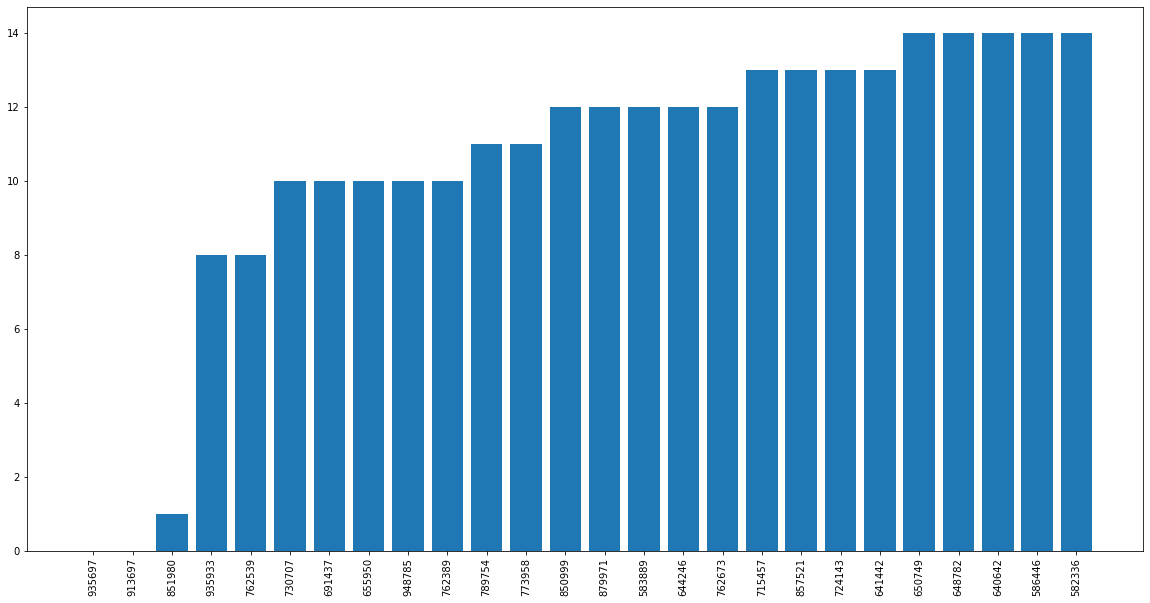

In [38]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.xticks(rotation='vertical')
x=df_time_f['qid'].values[:30]
y=[]
for i in x:
    i = str(i)
    y.append(i)
plt.bar(y, df_time_f['ans_time'].values[:30])
plt.show()

### Part 4

#### Extracting and sorting by no. of answers 

In [39]:
df_qac_qvc = df[['qid', 'qvc', 'qac']]
df_qac_qvc = df_qac_qvc.drop_duplicates()
df_qac_qvc = df_qac_qvc.sort_values(by=['qac'], ascending=False)

#### Number of views AND Number of answers v/s Question ID (Best 30(Number of answers))

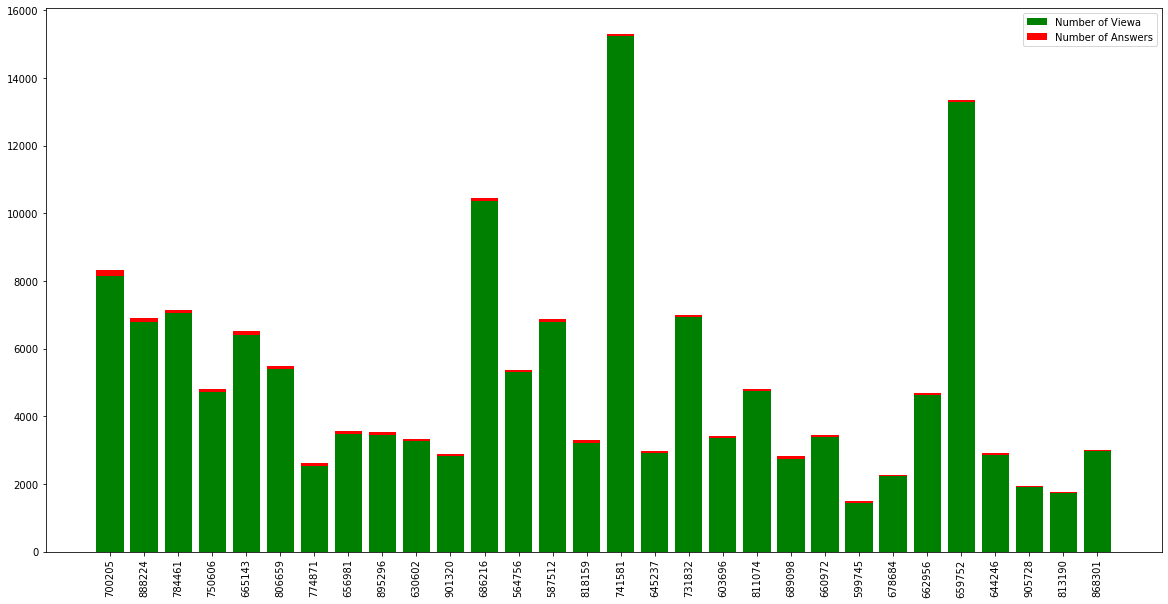

In [40]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.xticks(rotation='vertical')
x=df_qac_qvc['qid'].values[:30]
y=[]
for i in x:
    i = str(i)
    y.append(i)
p1 = plt.bar(y, df_qac_qvc['qvc'].values[:30], color='g')
p2 = plt.bar(y, df_qac_qvc['qac'].values[:30], bottom=df_qac_qvc['qvc'].values[:30], color='r')

label = ['Number of Viewa', 'Number of Answers']
plt.legend(labels=label)

plt.show()

### Part 5

#### Extracting Scores under individual tags

In [41]:
df_q_score = df[['qid', 'tags', 'qs']]
df_q_score = df_q_score.drop_duplicates()
xt = df_q_score['tags'].values
x1 = df_q_score['qid'].values
x2 = df_q_score['qs'].values
#df_q_score_sep = pd.DataFrame(columns=['tag', 'qid', 'qs'])
rows = []
for i in range(len(x1)):
    k = xt[i].split(',')
    for j in k:
        #df_q_score_sep = df_q_score_sep.append({'tag':j, 'qid':x1[i], 'qs':x2[i]}, ignore_index=True)
        l1 = [j, x1[i], x2[i]]
        rows.append(l1)

df_q_score_sep = pd.DataFrame(rows, columns=['tag', 'qid', 'qs'])
df_q_score_sep

,tag,qid,qs
0,php,563355,0
1,error,563355,0
2,gd,563355,0
3,image-processing,563355,0
4,lisp,563356,10
5,scheme,563356,10
6,subjective,563356,10
7,clojure,563356,10
8,cocoa-touch,563365,0
9,objective-c,563365,0


#### Calculating the Highest and Lowest scores per tag and respective Question IDs

In [42]:
df_min_qs = df_q_score_sep.groupby(['tag']).min()
df_max_qs = df_q_score_sep.groupby(['tag']).max()
df_max_qs = df_max_qs.rename(columns={'qs':'qs_max', 'qid':'qid_max'})
df_min_qs = df_min_qs.rename(columns={'qs':'qs_min', 'qid':'qid_min'})
df_qs_merge = pd.concat([df_max_qs, df_min_qs], axis=1)
df_qs_merge = df_qs_merge.sort_values(by=['qs_max'], ascending=False)
df_qs_merge = df_qs_merge.reset_index(level=0)
df_qs_merge

,tag,qid_max,qs_max,qid_min,qs_min
0,productivity,959024,203,580448,-3
1,subjective,961169,203,563356,-32
2,best-practices,960622,203,563493,-5
3,compression,960386,178,573210,-1
4,golf,938022,178,838004,0
5,unicode,956867,178,571174,0
6,twitter,954236,178,580369,-2
7,code-challenge,954926,178,585721,0
8,guidance,891094,171,587512,-1
9,not-programming-related,959288,171,563401,-12


#### Highest Score AND Lowest Score v/s Tag (Best 30(Highest Score))

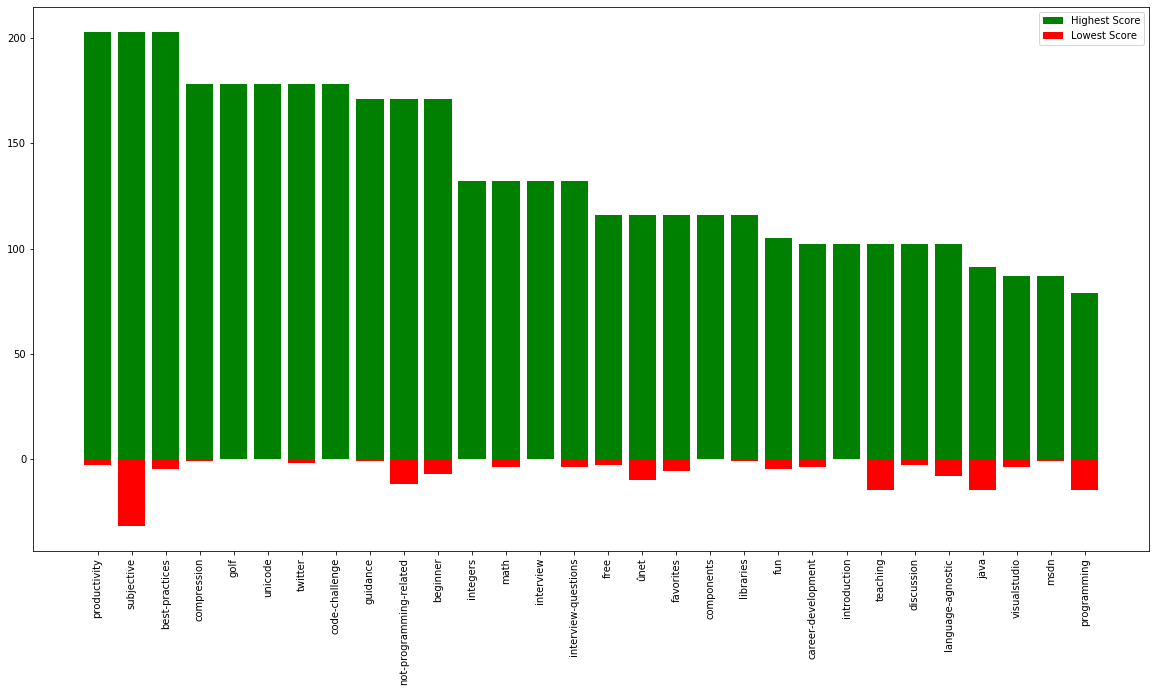

In [43]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.xticks(rotation='vertical')
p1 = plt.bar(df_qs_merge['tag'].values[:30], df_qs_merge['qs_max'].values[:30], color='g')
p2 = plt.bar(df_qs_merge['tag'].values[:30], df_qs_merge['qs_min'].values[:30], color='r')

label = ['Highest Score', 'Lowest Score']
plt.legend(labels=label)

plt.show()

### Part 6

#### Extracting Scores under individual tags

In [44]:
df_a_score = df[['aid', 'tags', 'as']]
df_a_score = df_a_score.drop_duplicates()
xt = df_a_score['tags'].values
x1 = df_a_score['aid'].values
x2 = df_a_score['as'].values
#df_a_score_sep = pd.DataFrame(columns=['tag', 'aid', 'as'])
rows = []
for i in range(len(x1)):
    k = xt[i].split(',')
    for j in k:
        #df_a_score_sep = df_a_score_sep.append({'tag':j, 'aid':x1[i], 'as':x2[i]}, ignore_index=True)
        l1 = [j, x1[i], x2[i]]
        rows.append(l1)

df_a_score_sep = pd.DataFrame(rows, columns=['tag', 'aid', 'as'])
df_a_score_sep

,tag,aid,as
0,php,563372,2
1,error,563372,2
2,gd,563372,2
3,image-processing,563372,2
4,php,563374,0
5,error,563374,0
6,gd,563374,0
7,image-processing,563374,0
8,lisp,563358,3
9,scheme,563358,3


#### Calculating the Highest and Lowest scores per tag and respective Answer IDs

In [45]:
df_min_as = df_a_score_sep.groupby(['tag']).min()
df_max_as = df_a_score_sep.groupby(['tag']).max()
df_max_as = df_max_as.rename(columns={'as':'as_max', 'aid':'aid_max'})
df_min_as = df_min_as.rename(columns={'as':'as_min', 'aid':'aid_min'})
df_as_merge = pd.concat([df_max_as, df_min_as], axis=1)
df_as_merge = df_as_merge.sort_values(by=['as_max'], ascending=False)
df_as_merge = df_as_merge.reset_index(level=0)
df_as_merge

,tag,aid_max,as_max,aid_min,as_min
0,programming,961405,345,564381,-8
1,whiteboard,953002,345,688123,-1
2,subjective,961405,345,563358,-13
3,guidance,952601,296,587517,-1
4,beginner,961452,296,563917,-9
5,not-programming-related,960508,296,563422,-12
6,fun,961143,181,566330,-4
7,language-agnostic,961208,176,563898,-9
8,poll,959493,176,577864,-8
9,discussion,959112,176,564764,-8


#### Highest Score AND Lowest Score v/s Tag (Best 30(Highest Score))

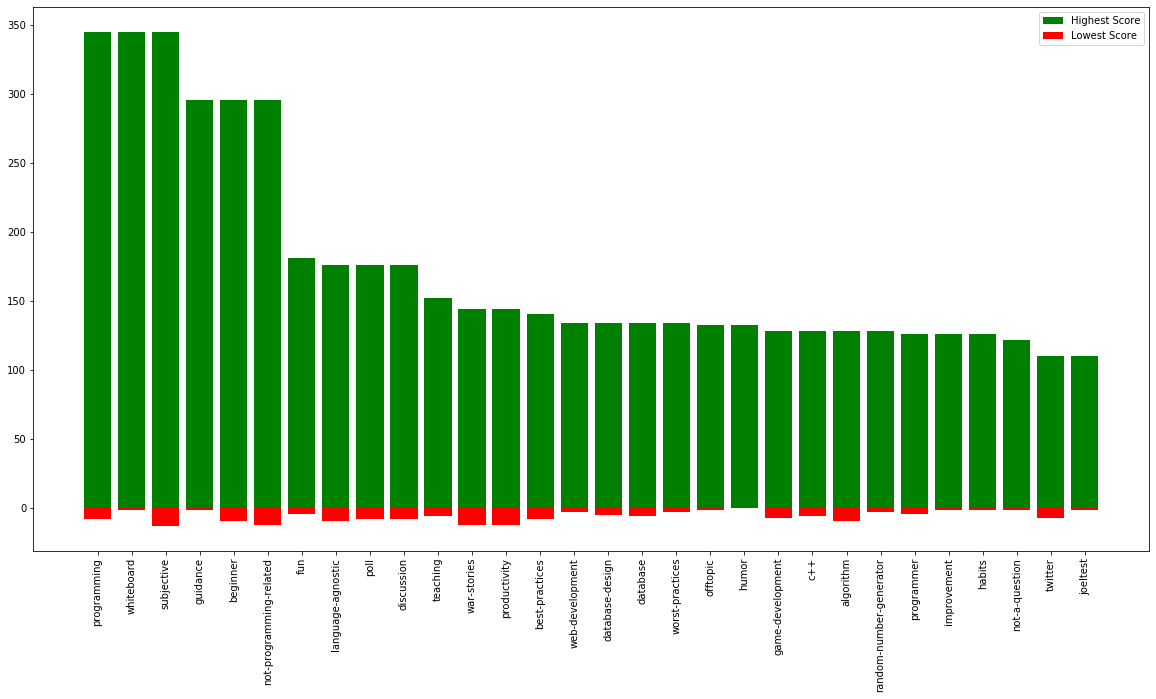

In [46]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.xticks(rotation='vertical')
p1 = plt.bar(df_as_merge['tag'].values[:30], df_as_merge['as_max'].values[:30], color='g')
p2 = plt.bar(df_as_merge['tag'].values[:30], df_as_merge['as_min'].values[:30], color='r')

label = ['Highest Score', 'Lowest Score']
plt.legend(labels=label)

plt.show()

### Part 7

#### Finding the activity order of users by number of answers posted

In [47]:
df_user = df[['aid','j']]
df_user = df_user.groupby(['j']).count().reset_index(level=0).sort_values(by=['aid'], ascending=False)
df_user

,j,aid
5353,22656.0,1683
5477,23354.0,1457
12458,69307.0,1033
5466,23283.0,1024
14452,76337.0,967
11876,66692.0,935
3599,12950.0,926
7083,33708.0,716
1236,3043.0,708
3940,14860.0,688


#### Number of answers posted v/s User ID (Best 30)

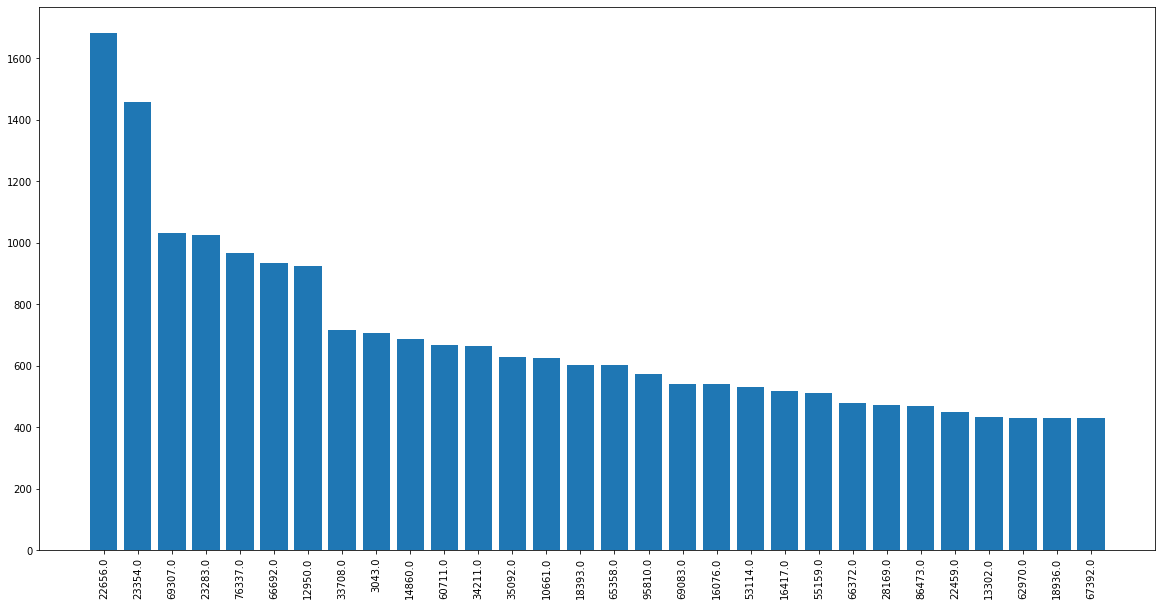

In [48]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.xticks(rotation='vertical')
x=df_user['j'].values[:30]
y=[]
for i in x:
    i = str(i)
    y.append(i)
plt.bar(y, df_user['aid'].values[:30])
plt.show()

#### Number of answers posted v/s User ID (Worst 30)

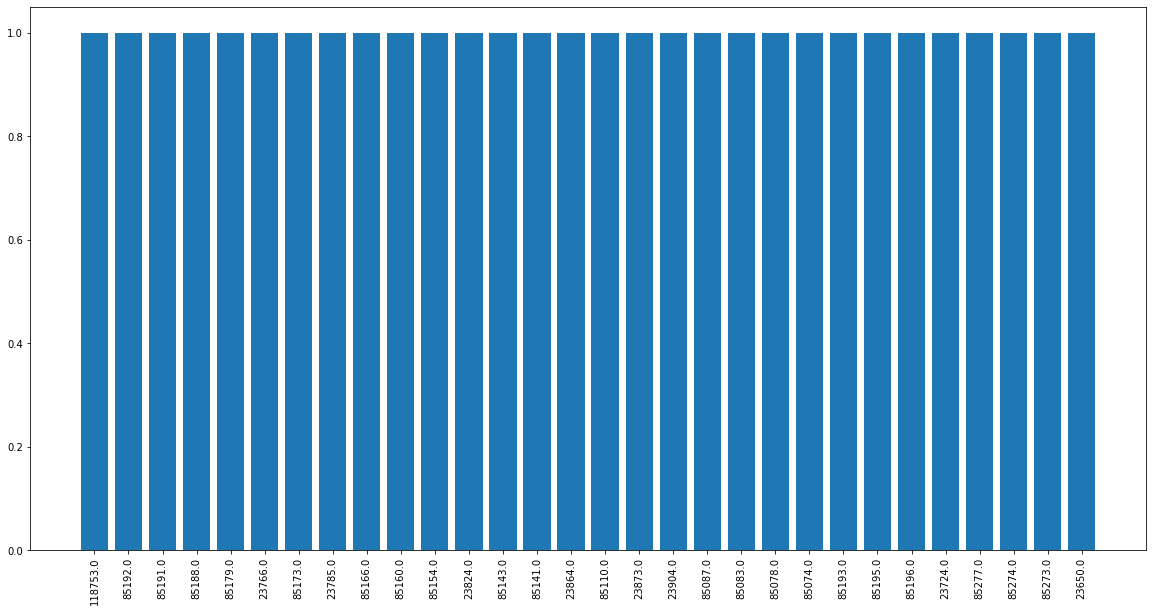

In [49]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.xticks(rotation='vertical')
x=df_user['j'].values[-30:][::-1]
y=[]
for i in x:
    i = str(i)
    y.append(i)
plt.bar(y, df_user['aid'].values[-30:][::-1])
plt.show()

### Part 8

#### Extracting the number of views wrt individual tags

In [50]:
df_q_score = df[[ 'tags', 'qid', 'qvc']]
df_q_score = df_q_score.drop_duplicates()
xt = df_q_score['tags'].values
x2 = df_q_score['qvc'].values
#df_q_score_sep = pd.DataFrame(columns=['tag', 'qid', 'qs'])
rows = []
for i in range(len(x2)):
    k = xt[i].split(',')
    for j in k:
        #df_q_score_sep = df_q_score_sep.append({'tag':j, 'qid':x1[i], 'qs':x2[i]}, ignore_index=True)
        l1 = [j, x2[i]]
        rows.append(l1)

df_q_score_sep = pd.DataFrame(rows, columns=['tag', 'qvc'])
df_q_score_sep

,tag,qvc
0,php,220
1,error,220
2,gd,220
3,image-processing,220
4,lisp,1047
5,scheme,1047
6,subjective,1047
7,clojure,1047
8,cocoa-touch,108
9,objective-c,108


#### Adding all the views tag-wise and sorting them

In [51]:
df_q_score_sep = df_q_score_sep.groupby(['tag']).sum().reset_index(level=0).sort_values(by=['qvc'], ascending=False)

#### Numbers of views v/s Tag (Best 30)

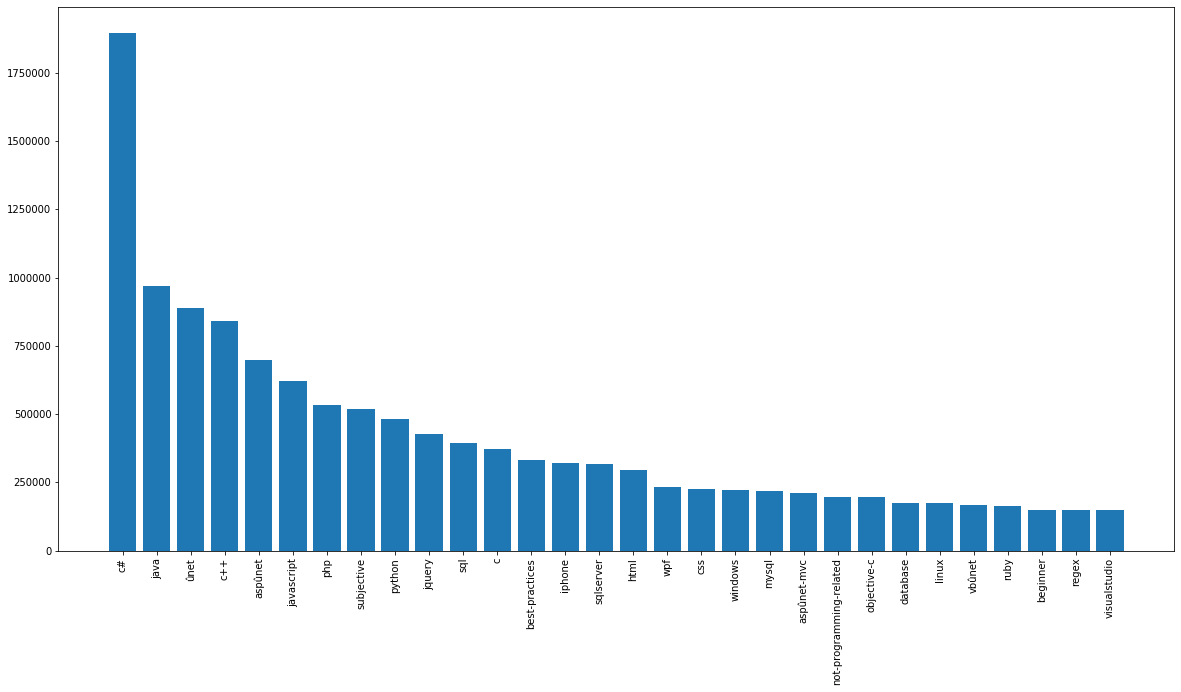

In [52]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.xticks(rotation='vertical')
plt.bar(df_q_score_sep['tag'].values[:30], df_q_score_sep['qvc'].values[:30])
plt.show()

#### Numbers of views v/s Tag (Worst 30)

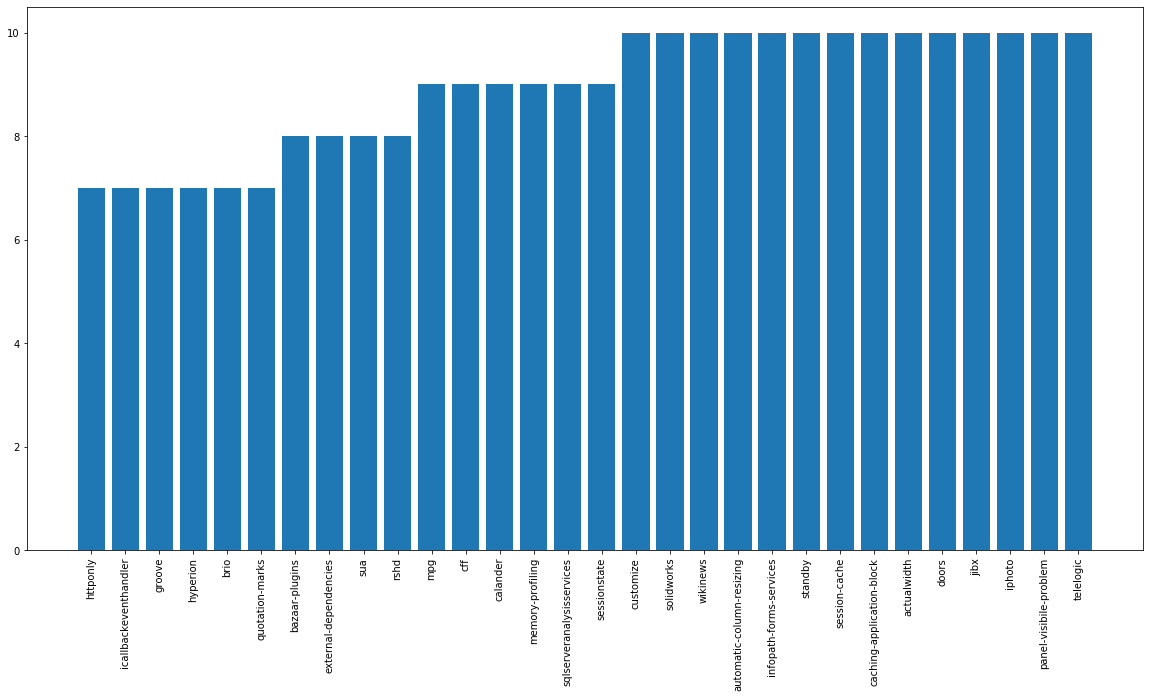

In [53]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20,10]
plt.xticks(rotation='vertical')
plt.bar(df_q_score_sep['tag'].values[-30:][::-1], df_q_score_sep['qvc'].values[-30:][::-1])
plt.show()